In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import tree, metrics

In [9]:
import lightgbm

# Ref implementation

## Single reg tree

In [58]:
df_train = pd.read_csv("https://raw.githubusercontent.com/Cuongvn08/tensorflow_kaggle_house_price/master/data/train.csv")

X = df_train[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df_train['SalePrice']

X_test = X.iloc[1000:]
y_test = y.iloc[1000:]

X = X.iloc[:1000]
y = y.iloc[:1000]

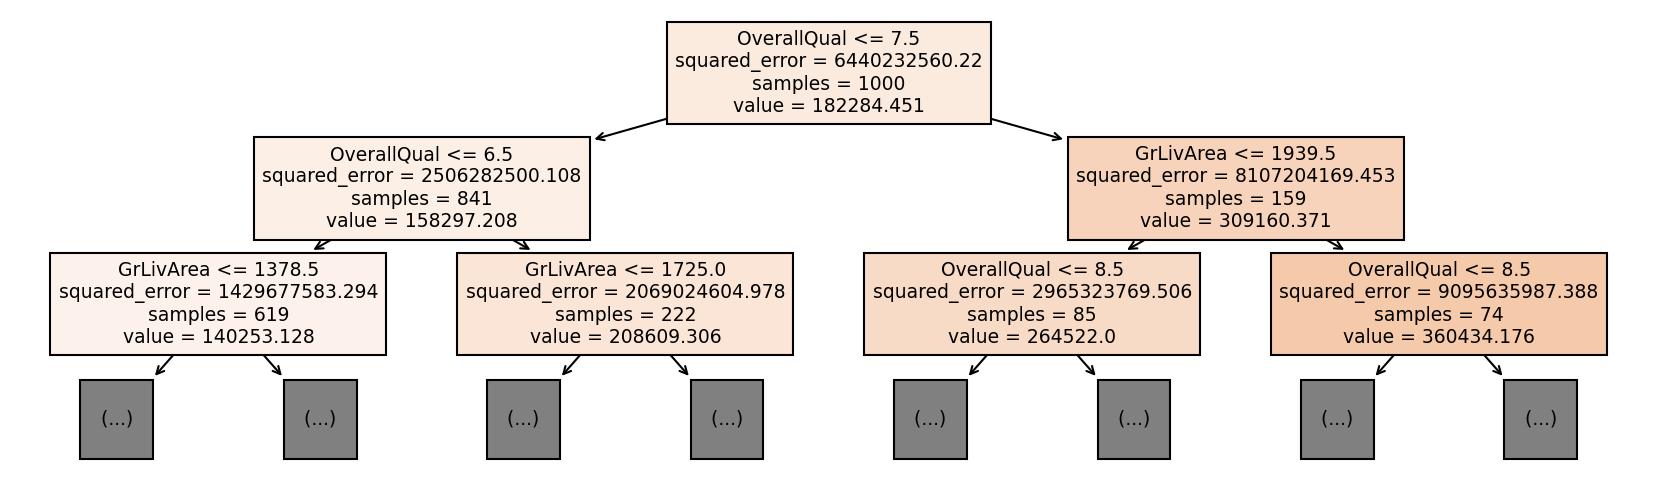

In [59]:
reg = tree.DecisionTreeRegressor(max_leaf_nodes=31)
reg.fit(X, y)

plt.figure(figsize=(14,4),dpi=150)
tree.plot_tree(reg, fontsize=9, max_depth=2, feature_names=X.columns, filled=True);

In [60]:
def eval_model(y, y_hat, y_test, y_hat_test):
    print('      Train |  Test')
    print(f'r2: {metrics.r2_score(y, y_hat):7.2f} |  {metrics.r2_score(y_test, y_hat_test):.2f}')
    print(f'rmse: {metrics.mean_squared_error(y, y_hat, squared=False):.0f} | {metrics.mean_squared_error(y_test, y_hat_test, squared=False):.0f}')

In [61]:
eval_model(y, reg.predict(X), y_test, reg.predict(X_test))

      Train |  Test
r2:    0.86 |  0.79
rmse: 30354 | 35727


## Lightgbm

In [64]:
model = lightgbm.LGBMRegressor(n_estimators=10, learning_rate=.2, )
model.fit(X, y)

eval_model(y, model.predict(X), y_test, model.predict(X_test))

      Train |  Test
r2:    0.82 |  0.76
rmse: 33971 | 38025


# Bootleg-gbm

In [83]:
class GBTRegressor:
    def __init__(self, learning_rate=0.1, n_estimators=10, **sklearn_tree_kwargs):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.sklearn_kwargs = sklearn_tree_kwargs
        
    def fit(self, X, y):
        self.F_0 = y.mean()
        F_i = self.F_0
        self.learners = []
        for i in range(self.n_estimators):
            target = y - F_i
            learner = tree.DecisionTreeRegressor(**self.sklearn_kwargs)
            learner.fit(X, target)
            F_i = F_i + learner.predict(X) * self.learning_rate
            self.learners.append(learner)
    
    def predict(self, X):
        return self.F_0 + self.learning_rate * np.sum([l.predict(X) for l in self.learners], axis=0)

In [84]:
model = GBTRegressor(n_estimators=10, learning_rate=.2)

In [85]:
model.fit(X, y)

In [87]:
eval_model(y, model.predict(X), y_test, model.predict(X_test))

      Train |  Test
r2:    0.98 |  0.73
rmse: 10944 | 40180
